In [1]:
import pandas as pd
df=pd.read_csv("Case Management- Shivpuri 2022 - 2022.csv")
df.shape  # 53,17
df.head()


,CASE NO.,NAME,CASTE,GENDER,CLASS,RELIGION,AGE,GEOGRAPHY,CONTACT,NATURE OF ISSUE,BRIEF FACTS,NATURE OF LEGAL SERVICE PROVIDED,CASE NO.,FORUM,PRESENT STATUS,HANDLER OF THE CASE,REMARKS
0,ZS/1/2021,Safaikarmis,SCs,NaN,Poor,Hindu,NaN,Shivpuri,8319302356,Manual Scavenging,Manual scavenging is being practiced in Shivpu...,"filed RTIs, Filed complaints before MPHRC",762-765/शिका./मा.अ.आ.2019,MPHRC,Collector filed report accepting the practice ...,Abhay Jain,No
1,NaN,Residents Vinega (BPL),STs,Male/Female,Poor,Unknown,NaN,"Binega, Shivpuri",8319302356,For Removal of statement 'Mera Parivar Gareeb ...,Residentail houses of BPLfamilies in the Bineg...,Filed complaints before NHRC,2616/12/44/2017,NHRC,Closed,Abhay Jain,No
2,NaN,Vinod Jatav and Others,SCs,Male,Poor,Hindu,NaN,Bhangad,8319302356,Caste based violence and murder of a dait person,Caste based violence led to murder of a dait p...,Filed writ petition on behalf of victim,not clear,MPHC- Gwalior,Appeal against bail order is pending before MP...,ABhay Jain and Swapnil,No
3,NaN,Resident of Amdad Colony,STs,Male/Female,Poor,Unknown,NaN,"Amdad Colony, Majhera",6261987515(Dayaram Ji,Complaint about basic entitements such as Educ...,The Complaint filed regarding the conditions o...,The Complaint filed regarding the conditions o...,1575/12/44/2020,NHRC,NHRC by Conditional Summon directed the Regist...,Abhay Jain,No
4,NaN,Nilu Chouhan,General,Female,Poor,Hindu,NaN,Shivpuri,NaN,Medical negligence,Children should get facilities from the admini...,Filed RTI,NaN,NaN,Closed,Abhay/Raju/Swapnil,"They get 50,000 covid ,5000 per month for CM B..."


In [2]:
df.columns

Index(['CASE NO.', 'NAME', 'CASTE', 'GENDER', 'CLASS', 'RELIGION ', 'AGE',
       'GEOGRAPHY', 'CONTACT', 'NATURE OF ISSUE ', 'BRIEF FACTS ',
       'NATURE OF LEGAL SERVICE PROVIDED ', 'CASE NO. ', 'FORUM ',
       'PRESENT STATUS ', 'HANDLER OF THE CASE ', 'REMARKS '],
      dtype='object')

In [3]:
# All those columns which contain just a single unique value are dropped
for i in df.columns:
    if df[i].nunique()<2:
        df.drop(i,axis=1,inplace=True)

In [4]:
df["NAME"].isnull().sum()

0

In [5]:
def name(i):
    if i in ["Residents of Aamdar Colony(Majhera)","Resident of Amdad Colony","Balarpur Nivasi","Residents of B.P.L.",
             "Residnes of Aamdar","Residents Vinega (BPL)","Hatod Residents & Farmers",
             "adivasi & Dalit of Mudkheda & Dholagarh","Adivasi & Dalit of Mudkheda & Dholagarh"]:
        return "Residents"
    elif i in ["Safaikarmis","Biomedical Waste","Karbala case","KK Debt Recovery","Mudkheda  Ptta","Parks WP",
              "MPHC RTI Rules","Marriage garden Rep","Bhadaiya Kund OA"]:
        return "Occupation based groups"
    else:
        return "Individuals"
    
df["Name_category"]=df["NAME"].apply(name)
    

In [6]:
df["CASTE"].isnull().sum()

19

In [7]:
df["CASTE"].value_counts()
def caste(i):
    if i in ["Adivasi","ST","STs","adivasi"]:
        return "ST"
    elif i in ["SC","SCs","Dalit","SC &ST","Jatav"]:
        return "SC"
    elif i in ["General","General ","general","genral"]:
        return "General"
    elif i in ["Na","Unknown"]:
        return None
    
df["CASTE"]=df["CASTE"].apply(caste)
df["CASTE"].value_counts()
#df.head()

ST         16
SC          8
General     7
Name: CASTE, dtype: int64

In [8]:
df["CASTE"].isnull().sum()
df.loc[df["NAME"]=="adivasi & Dalit of Mudkheda & Dholagarh","CASTE"]="ST"
df.loc[df["NAME"]=="Vicky Batham","CASTE"]="SC"
df.loc[df["NAME"]=="Rabudi Jatav","CASTE"]="ST"
df.loc[df["NAME"]=="Jaheer Khan","CASTE"]="OBC"


In [15]:
df["GENDER"].value_counts()

Male           16
Female          9
Male/Female     2
Female          2
male            2
Male            1
Both            1
Name: GENDER, dtype: int64

In [24]:
df.loc[df["GENDER"].isnull()]
df.loc[df["NAME"]=="Ram prakash ji","GENDER"]="Male"
df.loc[df["NAME"]=="Laxmi ","GENDER"]="Female"
df.loc[df["NAME"]=="Rajvardhan","GENDER"]="Male"
df.loc[df["NAME"]=="Chourasiya","GENDER"]="Male"
df.loc[df["NAME"]=="Sugra Bai & Ors","GENDER"]="Female"


In [27]:
df.loc[df["GENDER"].isnull()]
df["GENDER"].value_counts()
def gender(i):
    if i in ["Male","male","Male "]:
        return "Male"
    elif i in ["Female","Female "]:
        return "Female"
    else:
        return "Mixed"
    
df["GENDER"]=df["GENDER"].apply(gender)   
df["GENDER"].value_counts()
#for i in df["NAME"]:
#    print(i,len(i))

Mixed     21
Male      19
Female    13
Name: GENDER, dtype: int64

In [43]:
df.loc[((df["CLASS"].isnull())&((df["CASTE"]=="SC")|(df["CASTE"]=="ST"))),"CLASS"]="Poor"

In [47]:
df["CLASS"].isnull().sum()

15

In [35]:
df.loc[df["CLASS"].isnull()]

AGE
CONTACT
CASE NO. 


In [48]:
df["CLASS"].value_counts()
#df.loc[df["CLASS"]=="-"]
def clas(i):
    if i in ["Middle Class","Middle classs"]:
        return "Middle class"
    else:
        return "Poor"
    

df["CLASS"]=df["CLASS"].apply(clas)
df["CLASS"].value_counts()  

Poor            50
Middle class     3
Name: CLASS, dtype: int64

In [51]:
df.loc[df["NAME"]=="Abhay Jain","CLASS"]="Middle class"
df.loc[df["NAME"]=="Abhay","CLASS"]="Middle class"

In [59]:
df.loc[((df["Name_category"]=="Occupation based groups")|(df["Name_category"]=="Residents"))&(df["RELIGION "].isnull()),"RELIGION "]="Mixed"
#df.head()

In [65]:
#df.loc[df["RELIGION "].isnull()]
df.loc[df["NAME"]=="Sunita Adivasi","RELIGION "]="Adivasi"
df.loc[df["NAME"]=="Ranveer Adivasi","RELIGION "]="Adivasi"
df.loc[df["RELIGION "].isnull(),"RELIGION "]="Hindu"
df.loc[df["NAME"]=="Student to Ummed","RELIGION "]="Mixed"


In [71]:
df["RELIGION "].value_counts()
def religion(i):
    if i in ["Adivasi","Adiwasi"]:
        return "Adivasi"
    elif i in ["Mixed","Unknown","Unknown  "]:
        return "Mixed"
    else:
        return i
    
df["RELIGION "]=df["RELIGION "].apply(religion)
df["RELIGION "].value_counts()

Hindu      26
Mixed      14
Adivasi    11
Muslim      1
Jain        1
Name: RELIGION , dtype: int64

In [81]:
df.loc[(df["AGE"].isnull())&~(df["Name_category"]=="Individuals"),"AGE"]=df["AGE"].median()

In [87]:
df.loc[df["AGE"].isnull(),"AGE"]=df["AGE"].median()
df.head()

,NAME,CASTE,GENDER,CLASS,RELIGION,AGE,GEOGRAPHY,CONTACT,NATURE OF ISSUE,BRIEF FACTS,NATURE OF LEGAL SERVICE PROVIDED,CASE NO.,FORUM,PRESENT STATUS,HANDLER OF THE CASE,REMARKS,Name_category
0,Safaikarmis,SC,Mixed,Poor,Hindu,27.0,Shivpuri,8319302356,Manual Scavenging,Manual scavenging is being practiced in Shivpu...,"filed RTIs, Filed complaints before MPHRC",762-765/शिका./मा.अ.आ.2019,MPHRC,Collector filed report accepting the practice ...,Abhay Jain,No,Occupation based groups
1,Residents Vinega (BPL),ST,Mixed,Poor,Mixed,27.0,"Binega, Shivpuri",8319302356,For Removal of statement 'Mera Parivar Gareeb ...,Residentail houses of BPLfamilies in the Bineg...,Filed complaints before NHRC,2616/12/44/2017,NHRC,Closed,Abhay Jain,No,Residents
2,Vinod Jatav and Others,SC,Male,Poor,Hindu,27.0,Bhangad,8319302356,Caste based violence and murder of a dait person,Caste based violence led to murder of a dait p...,Filed writ petition on behalf of victim,not clear,MPHC- Gwalior,Appeal against bail order is pending before MP...,ABhay Jain and Swapnil,No,Individuals
3,Resident of Amdad Colony,ST,Mixed,Poor,Mixed,27.0,"Amdad Colony, Majhera",6261987515(Dayaram Ji,Complaint about basic entitements such as Educ...,The Complaint filed regarding the conditions o...,The Complaint filed regarding the conditions o...,1575/12/44/2020,NHRC,NHRC by Conditional Summon directed the Regist...,Abhay Jain,No,Residents
4,Nilu Chouhan,General,Female,Poor,Hindu,27.0,Shivpuri,NaN,Medical negligence,Children should get facilities from the admini...,Filed RTI,NaN,NaN,Closed,Abhay/Raju/Swapnil,"They get 50,000 covid ,5000 per month for CM B...",Individuals


In [92]:
df["CASE NO. "].value_counts()

2616/12/44/2017                                     2
762-765/शिका./मा.अ.आ.2019                           1
not clear                                           1
1575/12/44/2020                                     1
Complaint no- 15432077/ NHRC CN- 2958/12/44/2021    1
CA 2590/2019                                        1
888/12/44/2018                                      1
Name: CASE NO. , dtype: int64

In [93]:
for i in df.columns:
    if (df[i].isnull().sum()/df.shape[0])*100>75:
        df.drop(i,axis=1,inplace=True)

In [198]:
df["GEOGRAPHY"].value_counts().index

Index(['Shivpuri', 'Aamdhad Colony Mjera', 'Majhera, Shivpuri', 'Kamlaganj',
       'Mudkheda', 'Amdad Colony, Majhera', 'MP HC', 'Kathmai',
       'New Dwarikapuri Indrprasat colony, Shivpuri', 'Sevda, Shivpuri',
       'Bairad, Shivpuri', 'Arjungva kurd,Shivpuri', 'Bhangad', 'Lakhangava',
       'Ashoknager', 'Balarpur', 'Dholagarh', 'Mudkheda, Shivpuri',
       'Sanjay Colony', 'Guraval', 'Binega, Shivpuri', 'Lakhangavan',
       'Khude Chouraha', 'Siddeshwar Colony', 'Vinega', 'Mudkheda shivpuri',
       'Gram, Vinega'],
      dtype='object')

In [199]:
df["GEOGRAPHY"].value_counts()
def geography(i):
    if i in ['Kathmai','Arjungva kurd,Shivpuri','Lakhangava','Balarpur','Lakhangavan']:
        return "East Shivpuri"
    elif i in []:
        return "West Shivpuri"
    elif i in ['Kamlaganj','Mudkheda','Mudkheda, Shivpuri','Mudkheda shivpuri',
    'New Dwarikapuri Indrprasat colony, Shivpuri','Sevda, Shivpuri','Bairad, Shivpuri','Bhangad','Dholagarh',
    'Binega, Shivpuri','Vinega','Gram, Vinega']:
        return "North Shivpuri"
    elif i in ['Aamdhad Colony Mjera', 'Majhera, Shivpuri','Amdad Colony, Majhera','Ashoknager','Sanjay Colony','Guraval']:
        return "South Shivpuri"
    else:
        return "Central Shivpuri"
        
df["GEOGRAPHY"]=df["GEOGRAPHY"].apply(geography)
df["GEOGRAPHY"].value_counts()

Central Shivpuri    24
North Shivpuri      14
South Shivpuri      10
East Shivpuri        5
Name: GEOGRAPHY, dtype: int64

In [111]:
school=[]
land=[]
water=[]
env=[]
corruption=[]
for i in df["NATURE OF ISSUE "].value_counts().index:
    if "school" in i or "School" in i:
        school.append(i)
    elif "land" in i or "Land" in i:
        land.append(i)
    elif "water" in i or "Water" in i or "jal" in i or "Jal" in i:
        water.append(i)
    elif "Environment" in i:
        env.append(i)
    elif "Corruption" in i:
        corruption.append(i)

In [119]:
school

['Govt. School Kamlaganj  information', 'Primary School']

In [122]:
len(water)+len(land)+len(school)+len(env)+len(corruption) # 14--46
df["NATURE OF ISSUE "].value_counts().index
environment=["Environment related",'mining in Eco sensitive Zone','Mining']
finance=["Compensation",'Compensation ', 'Ration and flood relief compensation','Flood Relief compensation','Debt Recovery']
corruption=["Corruption in appointing employees",'Personal info and Excessive fee']
land=['Land Issue','Seemankan',
 'One Pandit has  take possession of his land  and not  vacating the same. the case is already going on in the tehsil court under section 250 of MPLRC.  ',
 'land and PM Samman Nidhi ',
 'Illegal enchroachment of land by upper caste','illegal enchroachment in the parks',
 'Land Rights', 'Non Compliance of New Model Law','CFR & IFR',
 'Land Rights Book',
 'Maintainance and Land related']
water=['Nal-Jal yojna','Light, Water','Water supply was not given by Nagar Paliuka under Amrit Jal Yojna']
education=['Govt. School Kamlaganj  information', 'Primary School','Scholership issue']
dignity=["Manual Scavenging","For Removal of statement 'Mera Parivar Gareeb hai'",'Illegally arrested by Police']
entitlement=[ 'Adding family member to Samagya ID','Namantaran','B.P.L. issue','Cycle Issue ','Mini  Aganvadi',
             'Complaint about basic entitements such as Education sevices, Anganwadi services, Electricity services etc to the Sahariya families']
sanitation=['Dumping  issue', 'Cleanliness of  public toilet','Improper Dicomposition',
       'Drain and cleaning of Gali near to  Office']
medical=['Medical negligence','Health Issue']
cruelty=['cruelty and Dowry related','Caste based violence and murder of a dait person']
miscellaneous=['College m kiye gye karyo ki list','151 Issue']


In [123]:
df["NATURE OF ISSUE "].isnull().sum()

4

In [124]:
def issue(i):
    if i in environment:
        return "environment"
    elif i in finance:
        return "finance"
    elif i in corruption:
        return "corruption"
    elif i in land:
        return "land"
    elif i in water:
        return "water"
    elif i in dignity:
        return "dignity"
    elif i in education:
        return "education"
    elif i in entitlement:
        return "entitlement"
    elif i in sanitation:
        return "sanitation"
    elif i in medical:
        return "medical"
    elif i in cruelty:
        return "cruelty"
    elif i in miscellaneous:
        return "miscellaneous"
    else:
        return i
    
    
df["NATURE OF ISSUE "]=df["NATURE OF ISSUE "].apply(issue)   
df["NATURE OF ISSUE "].value_counts()

land             11
entitlement       6
finance           6
environment       4
sanitation        4
dignity           3
corruption        3
water             3
education         3
cruelty           2
medical           2
miscellaneous     2
Name: NATURE OF ISSUE , dtype: int64

In [126]:
df.loc[(df["NATURE OF ISSUE "].isnull())&(df["NAME"]=="Renu Sankhla"),"NATURE OF ISSUE"]="sanitation"
df.loc[(df["NATURE OF ISSUE "].isnull()),"NATURE OF ISSUE"]="land"

In [148]:
application=[]
case=[]
rep=[]
other=[]
for i in df["NATURE OF LEGAL SERVICE PROVIDED "].value_counts().index:
    if "Appl" in i or "appl" in i:
        application.append(i)
    elif "Case" in i or "case" in i:
        case.append(i)
    elif "Rep" in i or "rep" in i:
        rep.append(i)
    else:
        other.append(i)
    
application
case
rep
other

def service(i):
    if i in application:
        return "application"
    elif i in case:
        return "case filed"
    elif i in rep:
        return "legal representation"
    elif i in other:
        return "Other assistance"
    
df["Legal Assistance"]=df["NATURE OF LEGAL SERVICE PROVIDED "].apply(service)
df["Legal Assistance"].value_counts()

Other assistance        20
application             13
legal representation     6
case filed               6
Name: Legal Assistance, dtype: int64

In [152]:
df.loc[df["Legal Assistance"].isnull(),"Legal Assistance"]="application"

In [167]:
df.loc[(df["FORUM "].isnull())&~(df["NATURE OF LEGAL SERVICE PROVIDED "].isnull()),"FORUM "]=df["NATURE OF LEGAL SERVICE PROVIDED "]
#df["NATURE OF LEGAL SERVICE PROVIDED "]

In [169]:
df["FORUM "].value_counts()
district=["PUS Lok Adalat","Collected Shivpuri","Public Engineering Department","Sankul and District Education Officer",
          "Muncipal Council of Shivpuri","nothing yet. waiting for his reply.  planning to send a legal notice under SC ST Act",
         "Talked to Sachiv Toriyakalsha","Collected, Shivpuri","Bail dilvayi",
          "Accompanied him to  Lok seva kendra and spoke to patwari about adding his name in the  PM Kisan Samman Nidhi",
         "Tehsil","Patwari","Panchayat","Collector","Police Station","Filed RTI"]
national=["NHRC","NGT, Bhopal Bench","National Green Tribunal","RTI, First Appeal and Second Appeal","WCD, Shivpuri",
         "Filed Letter petition in NGT ","Supreme Court","NCST and  SP","CM Helpline/ NHRC","NCPCR"]
def forum(i):
    if i in district:
        return "District"
    elif i in national:
        return "National"
    else:
        return "State"
    
df["Level of Intervention"]=df["FORUM "].apply(forum)
df["Level of Intervention"].value_counts()

State       22
District    18
National    13
Name: Level of Intervention, dtype: int64

In [176]:
df["PRESENT STATUS "].value_counts().index
def status(i):
    if i in ['drafted  OA','Drafted legal rep but survey of the garden is yet to be conducted',
            'Drafted Rep', 'Representaion sent but writ petition is being drafted',
            'Appeal against bail order is pending before MPHC- Gwalior','Land right book is made but yet to be given',
            'Complaint is sent to collector for inquiry and NHRC Case is registered/ ']:
        return "On-going"
    elif i in ['Closed','Received Compensation', 'Disposed off ','Closure of case with direction to the authority', 
               'Done', 'Work Done','Disposed off and decision came in favor of Residents of the Colony',
               'Disposed off and decision came in favor of KK',
               'Collector filed report accepting the practice of manual scavenging','Representaion sent, and land was vacated ',
              'Released','NHRC by Conditional Summon directed the Registry to issue final reminders to the Principal Secretary, Department of Health and Family Welfare, and the Principal Secretary, Tribal Department, Government of Madhya Pradesh,about compliance of the direction issued by the it.']:
        return "Completed"
    else:
        return "Pending"
    
df["PRESENT STATUS "]=df["PRESENT STATUS "].apply(status)
df["PRESENT STATUS "].value_counts()

Pending      32
Completed    13
On-going      8
Name: PRESENT STATUS , dtype: int64

In [182]:
df["HANDLER OF THE CASE "].value_counts()
def handler(i):
    if i=="Raju":
        return "Raju"
    elif i in ["Abhay","Abhay Jain"]:
        return "Abhay"
    elif i in ["ABhay Jain and Swapnil","Abhay/Raju/Swapnil"]:
        return "Swapnil and Othrs"
    elif i in ["Abhay/Raju/Samarath/Akhil","Abhay/Akhil/raju"]:
        return "Akhil and Othrs"
    else:
        return "Abhay/Raju"
    
df["HANDLER OF THE CASE "]=df["HANDLER OF THE CASE "].apply(handler)
df["HANDLER OF THE CASE "].value_counts()

Abhay/Raju           33
Raju                  9
Abhay                 7
Swapnil and Othrs     2
Akhil and Othrs       2
Name: HANDLER OF THE CASE , dtype: int64

In [201]:
df.columns

Index(['NAME', 'CASTE', 'GENDER', 'CLASS', 'RELIGION ', 'AGE', 'GEOGRAPHY',
       'NATURE OF ISSUE ', 'BRIEF FACTS ', 'NATURE OF LEGAL SERVICE PROVIDED ',
       'FORUM ', 'PRESENT STATUS ', 'HANDLER OF THE CASE ', 'REMARKS ',
       'Name_category', 'NATURE OF ISSUE', 'Legal Assistance',
       'Level of Intervention'],
      dtype='object')

In [207]:
df=df.drop(['NAME','BRIEF FACTS ', 'NATURE OF LEGAL SERVICE PROVIDED ','FORUM ','REMARKS ','NATURE OF ISSUE'],axis=1)

In [211]:
df["CASTE"]=df["CASTE"].fillna("Mixed")

In [219]:
df["NATURE OF ISSUE "]=df["NATURE OF ISSUE "].fillna("land")

In [220]:
df.isnull().sum()

CASTE                    0
GENDER                   0
CLASS                    0
RELIGION                 0
AGE                      0
GEOGRAPHY                0
NATURE OF ISSUE          0
PRESENT STATUS           0
HANDLER OF THE CASE      0
Name_category            0
Legal Assistance         0
Level of Intervention    0
dtype: int64

In [221]:
df.head()

,CASTE,GENDER,CLASS,RELIGION,AGE,GEOGRAPHY,NATURE OF ISSUE,PRESENT STATUS,HANDLER OF THE CASE,Name_category,Legal Assistance,Level of Intervention
0,SC,Mixed,Poor,Hindu,27.0,Central Shivpuri,dignity,Completed,Abhay,Occupation based groups,Other assistance,State
1,ST,Mixed,Poor,Mixed,27.0,North Shivpuri,dignity,Completed,Abhay,Residents,Other assistance,National
2,SC,Male,Poor,Hindu,27.0,North Shivpuri,cruelty,On-going,Swapnil and Othrs,Individuals,Other assistance,State
3,ST,Mixed,Poor,Mixed,27.0,South Shivpuri,entitlement,Completed,Abhay,Residents,Other assistance,National
4,General,Female,Poor,Hindu,27.0,Central Shivpuri,medical,Completed,Swapnil and Othrs,Individuals,Other assistance,District


# EXPLORATORY DATA ANALYSIS

In [227]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# UNIVARIATE ANALYSIS

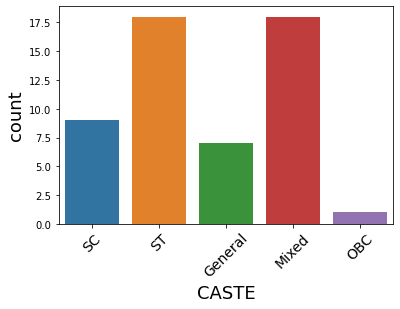

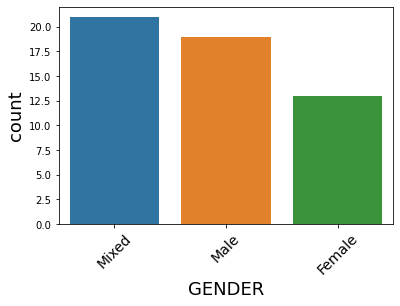

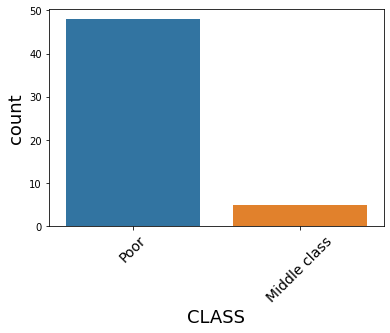

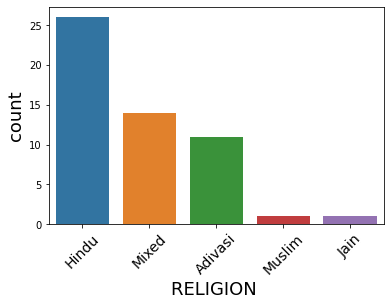

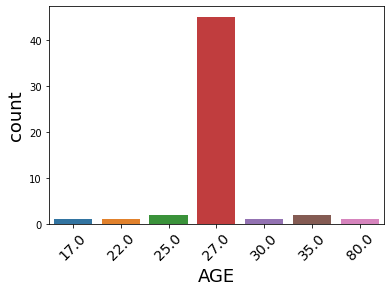

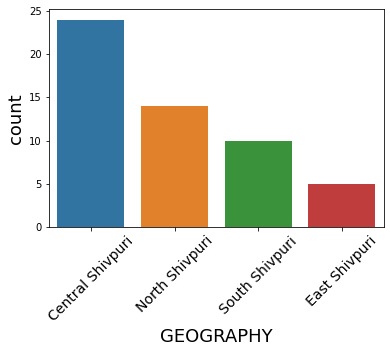

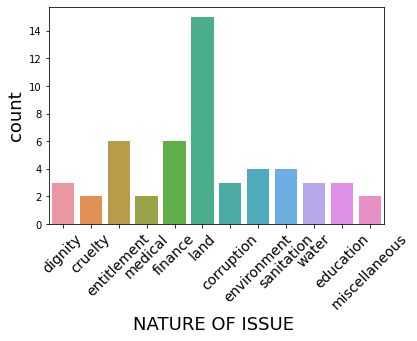

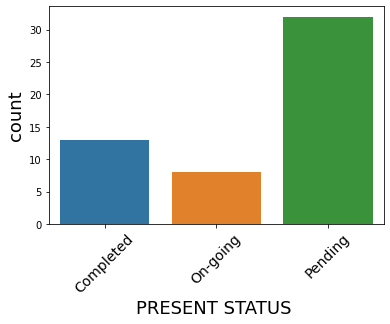

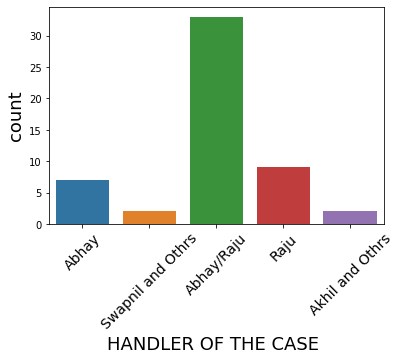

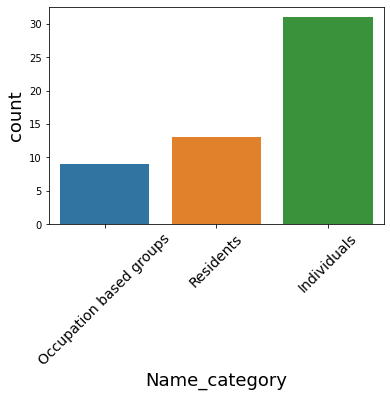

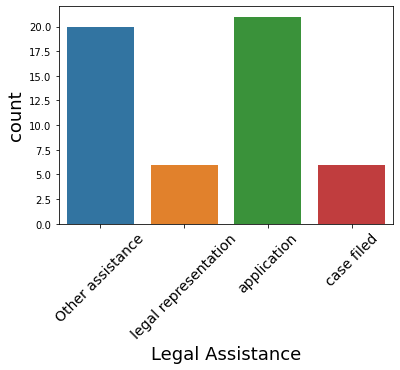

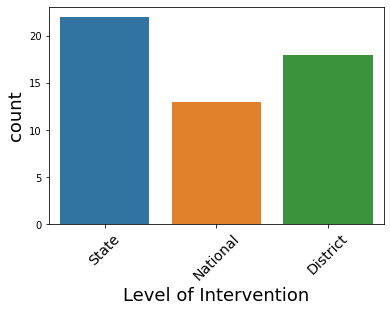

In [231]:
for i in df.columns:
    plt.tight_layout()
    plt.xticks(fontsize=14, rotation=45)
    plt.xlabel(i, fontsize=18)
    plt.ylabel("COUNT", fontsize=18)
    sns.countplot(df[i])
    plt.show()

# BIVARIATE ANALYSIS

<Figure size 432x288 with 0 Axes>

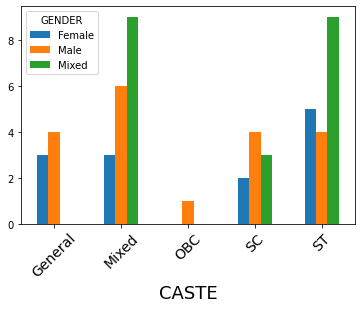

<Figure size 432x288 with 0 Axes>

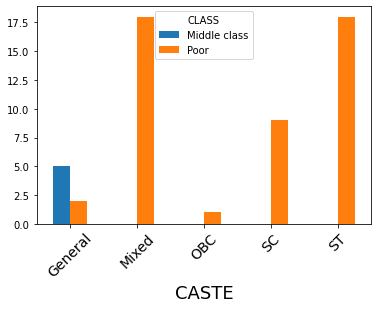

<Figure size 432x288 with 0 Axes>

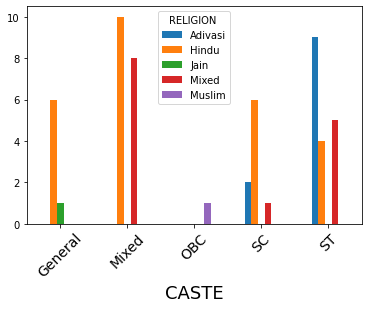

<Figure size 432x288 with 0 Axes>

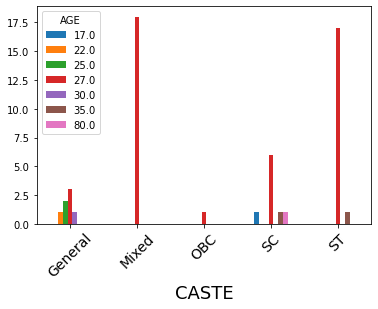

<Figure size 432x288 with 0 Axes>

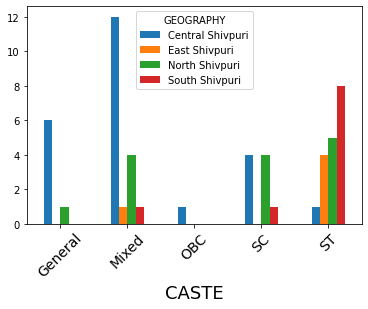

<Figure size 432x288 with 0 Axes>

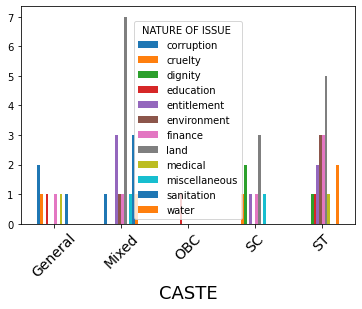

<Figure size 432x288 with 0 Axes>

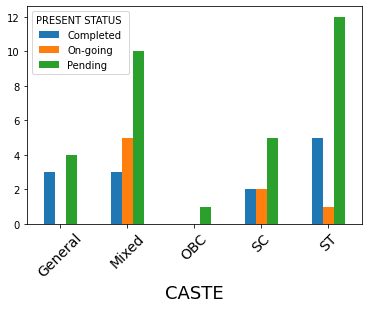

<Figure size 432x288 with 0 Axes>

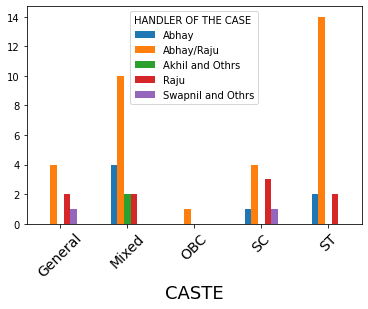

<Figure size 432x288 with 0 Axes>

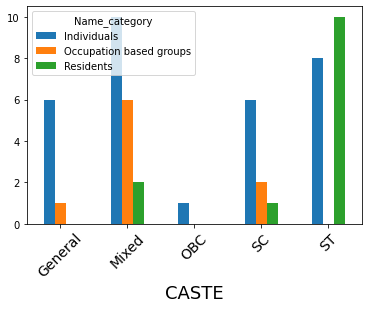

<Figure size 432x288 with 0 Axes>

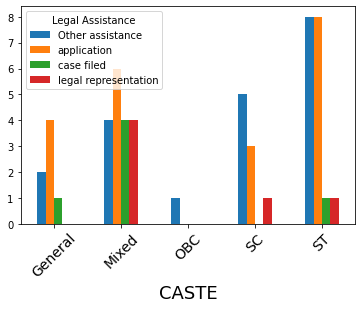

<Figure size 432x288 with 0 Axes>

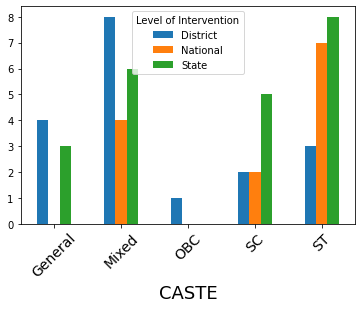

<Figure size 432x288 with 0 Axes>

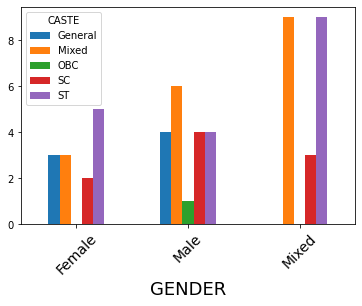

<Figure size 432x288 with 0 Axes>

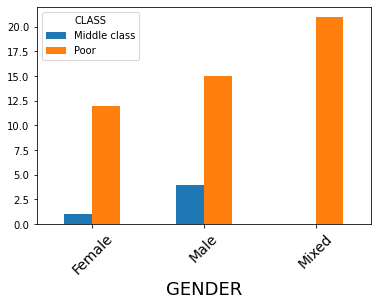

<Figure size 432x288 with 0 Axes>

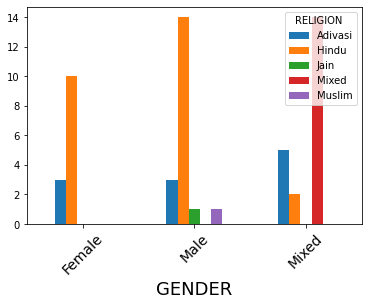

<Figure size 432x288 with 0 Axes>

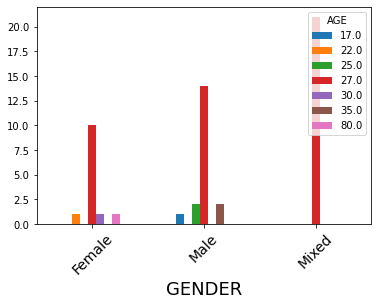

<Figure size 432x288 with 0 Axes>

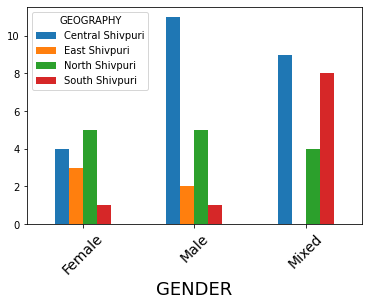

<Figure size 432x288 with 0 Axes>

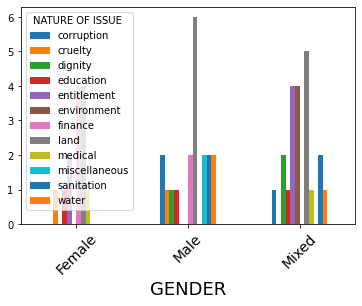

<Figure size 432x288 with 0 Axes>

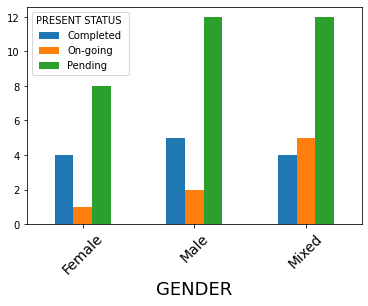

<Figure size 432x288 with 0 Axes>

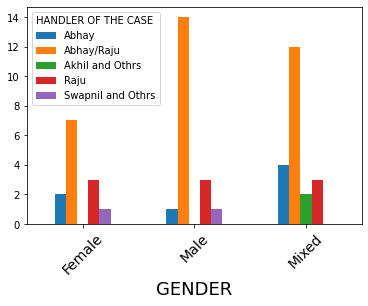

<Figure size 432x288 with 0 Axes>

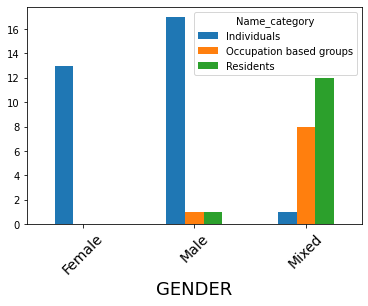

<Figure size 432x288 with 0 Axes>

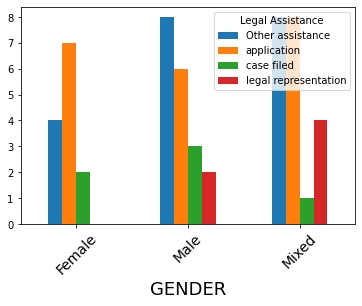

<Figure size 432x288 with 0 Axes>

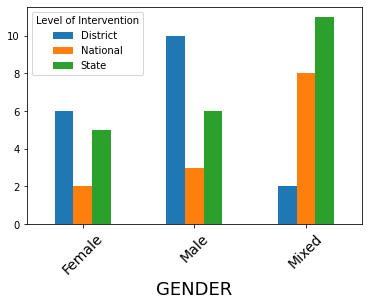

<Figure size 432x288 with 0 Axes>

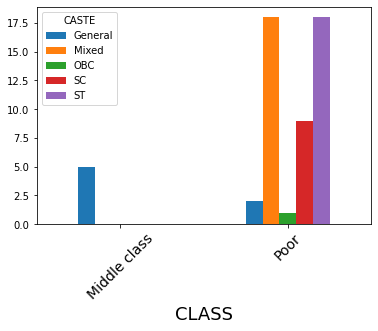

<Figure size 432x288 with 0 Axes>

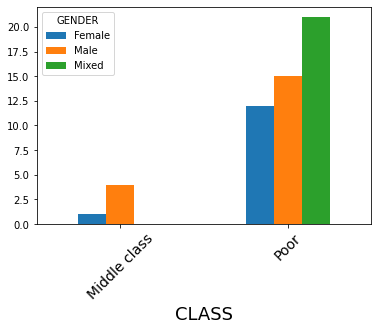

<Figure size 432x288 with 0 Axes>

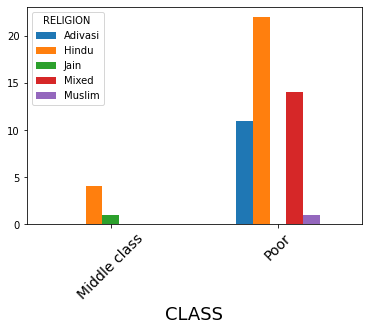

<Figure size 432x288 with 0 Axes>

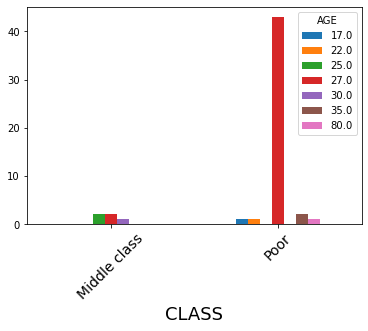

<Figure size 432x288 with 0 Axes>

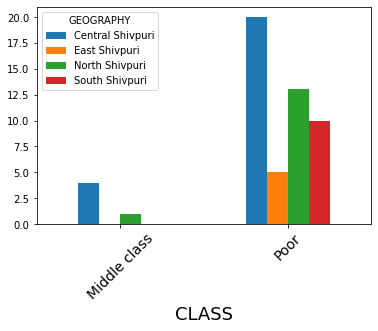

<Figure size 432x288 with 0 Axes>

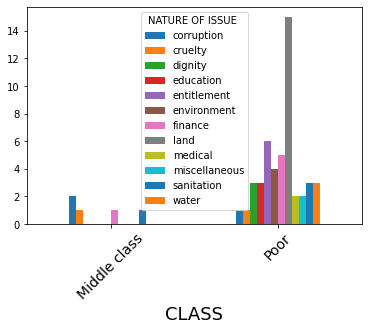

<Figure size 432x288 with 0 Axes>

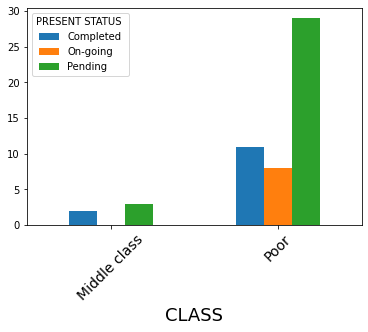

<Figure size 432x288 with 0 Axes>

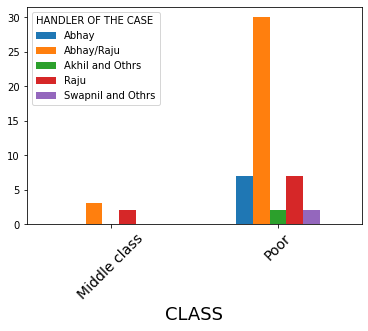

<Figure size 432x288 with 0 Axes>

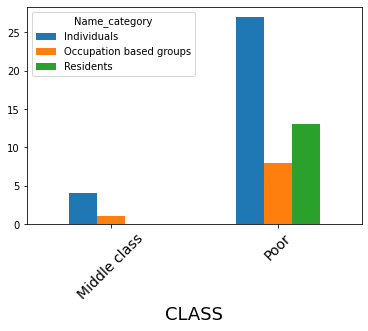

<Figure size 432x288 with 0 Axes>

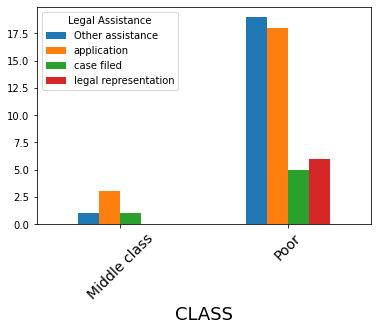

<Figure size 432x288 with 0 Axes>

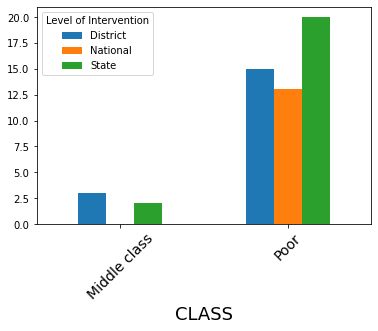

<Figure size 432x288 with 0 Axes>

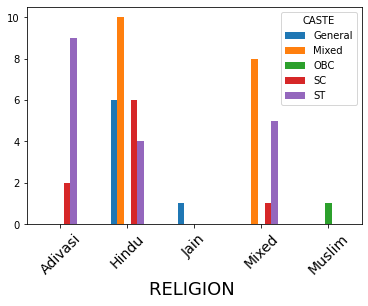

<Figure size 432x288 with 0 Axes>

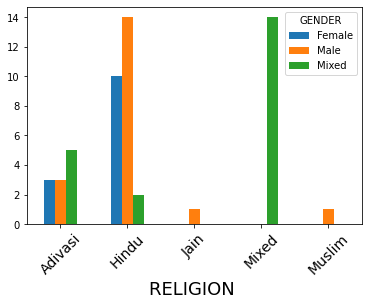

<Figure size 432x288 with 0 Axes>

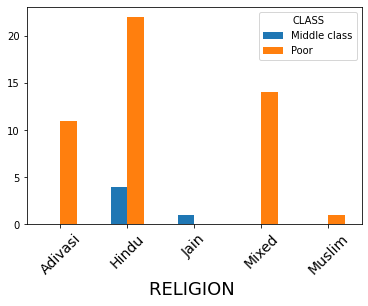

<Figure size 432x288 with 0 Axes>

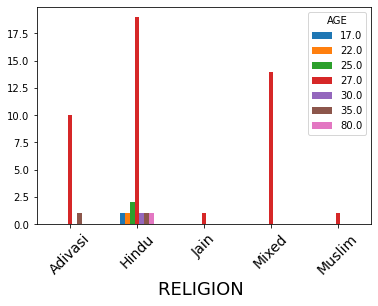

<Figure size 432x288 with 0 Axes>

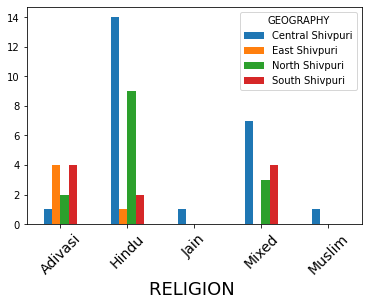

<Figure size 432x288 with 0 Axes>

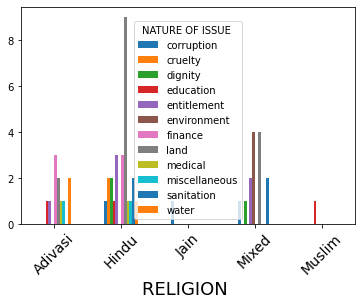

<Figure size 432x288 with 0 Axes>

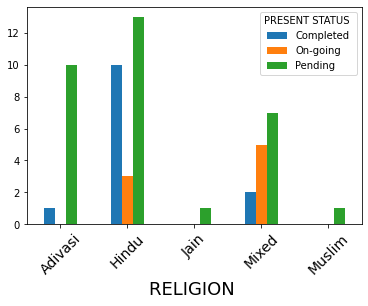

<Figure size 432x288 with 0 Axes>

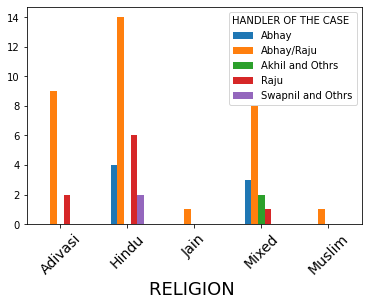

<Figure size 432x288 with 0 Axes>

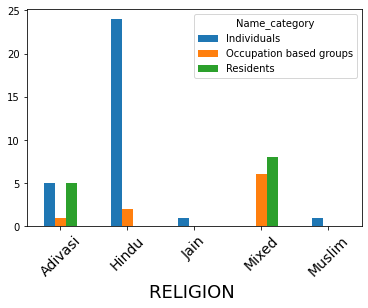

<Figure size 432x288 with 0 Axes>

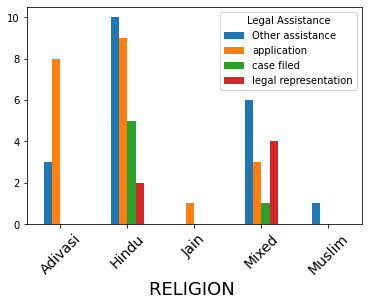

<Figure size 432x288 with 0 Axes>

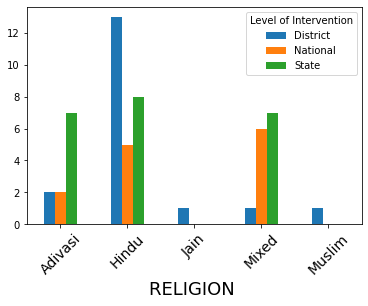

<Figure size 432x288 with 0 Axes>

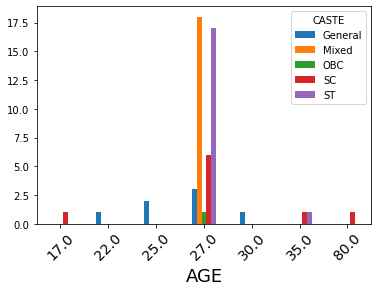

<Figure size 432x288 with 0 Axes>

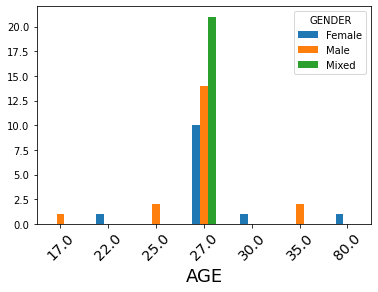

<Figure size 432x288 with 0 Axes>

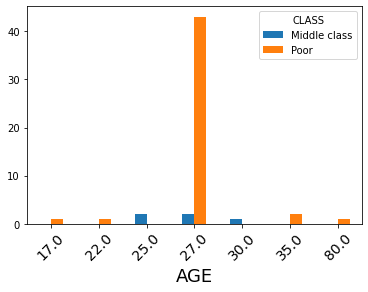

<Figure size 432x288 with 0 Axes>

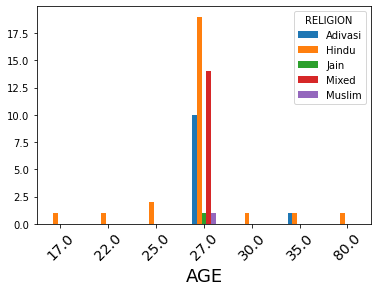

<Figure size 432x288 with 0 Axes>

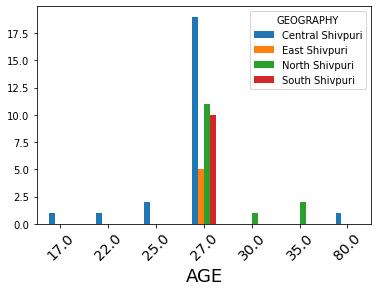

<Figure size 432x288 with 0 Axes>

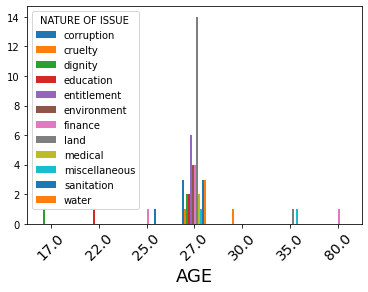

<Figure size 432x288 with 0 Axes>

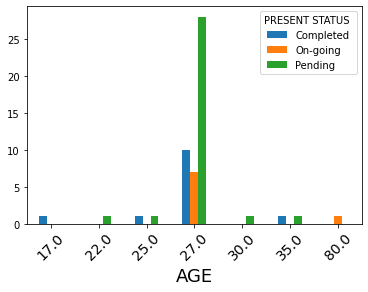

<Figure size 432x288 with 0 Axes>

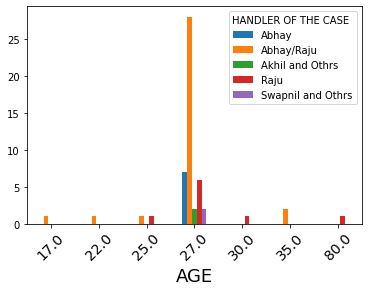

<Figure size 432x288 with 0 Axes>

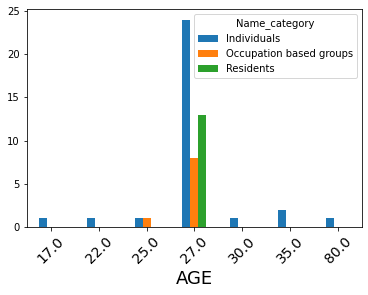

<Figure size 432x288 with 0 Axes>

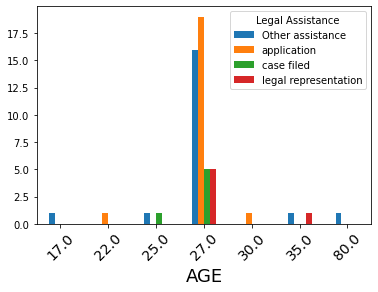

<Figure size 432x288 with 0 Axes>

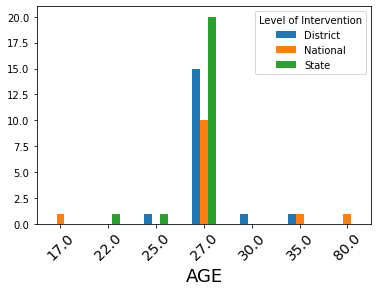

<Figure size 432x288 with 0 Axes>

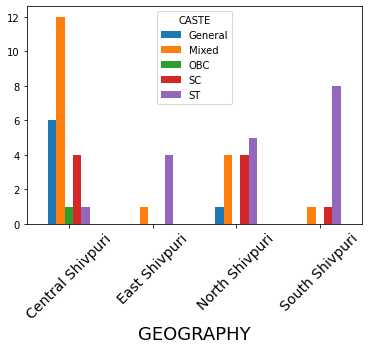

<Figure size 432x288 with 0 Axes>

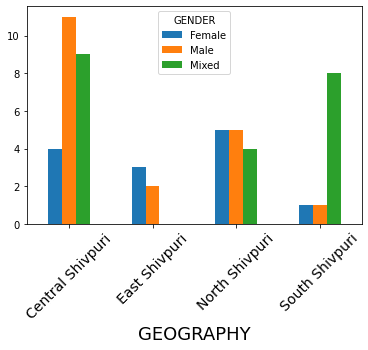

<Figure size 432x288 with 0 Axes>

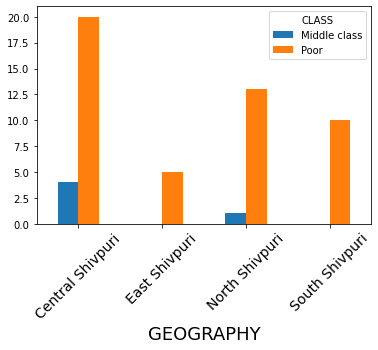

<Figure size 432x288 with 0 Axes>

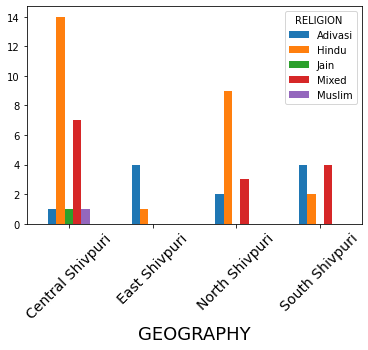

<Figure size 432x288 with 0 Axes>

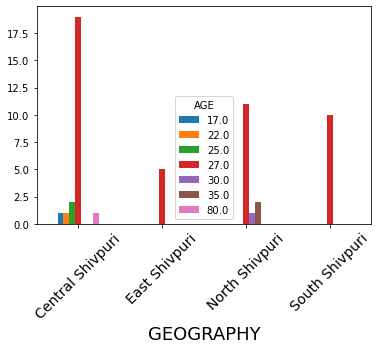

<Figure size 432x288 with 0 Axes>

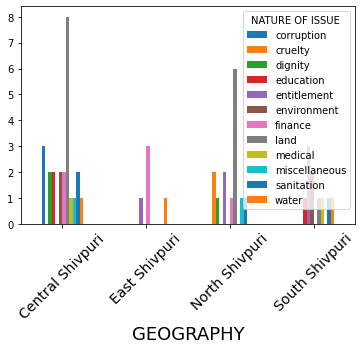

<Figure size 432x288 with 0 Axes>

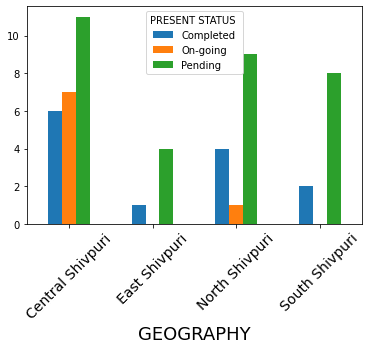

<Figure size 432x288 with 0 Axes>

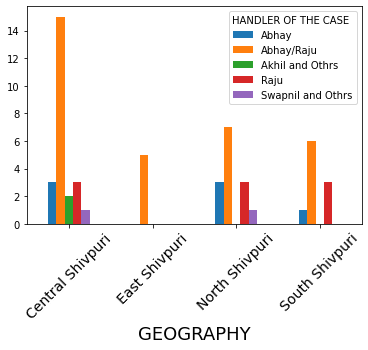

<Figure size 432x288 with 0 Axes>

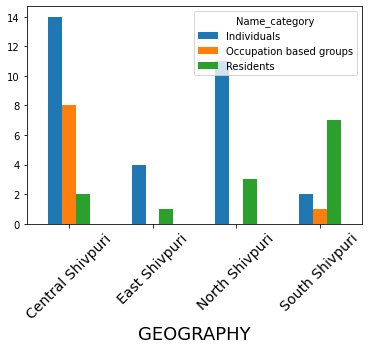

<Figure size 432x288 with 0 Axes>

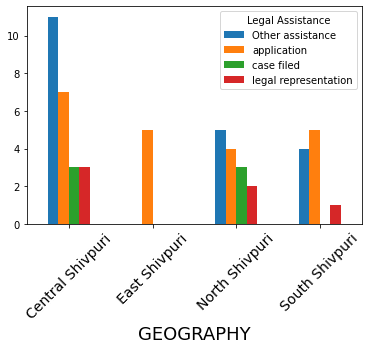

<Figure size 432x288 with 0 Axes>

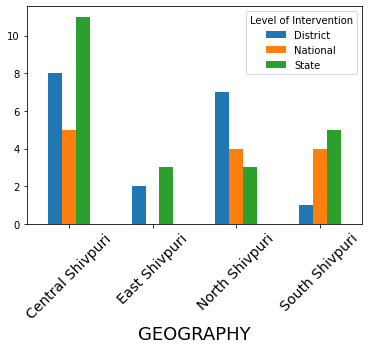

<Figure size 432x288 with 0 Axes>

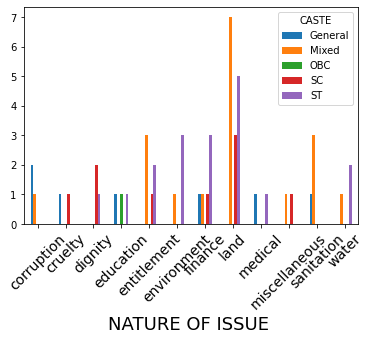

<Figure size 432x288 with 0 Axes>

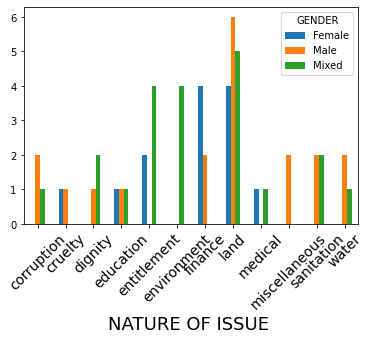

<Figure size 432x288 with 0 Axes>

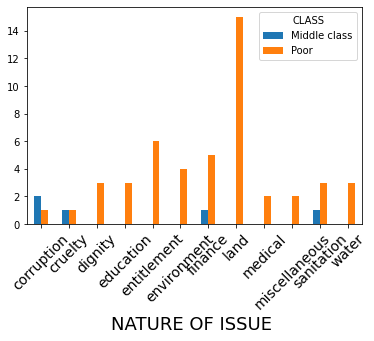

<Figure size 432x288 with 0 Axes>

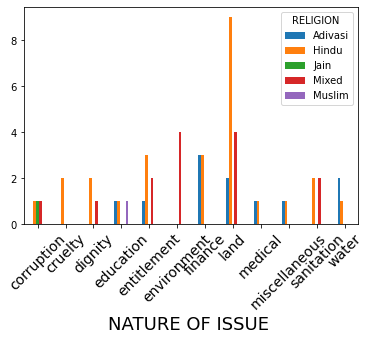

<Figure size 432x288 with 0 Axes>

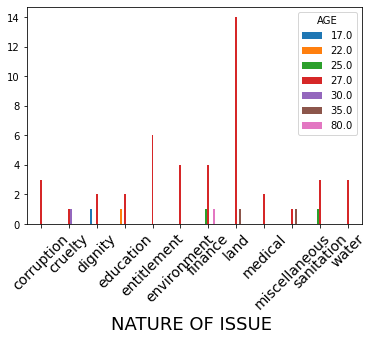

<Figure size 432x288 with 0 Axes>

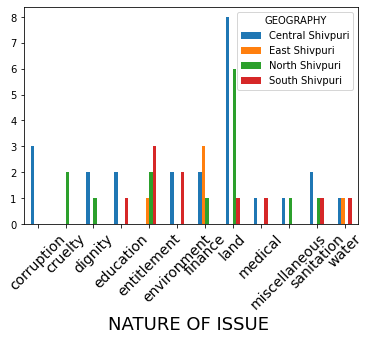

<Figure size 432x288 with 0 Axes>

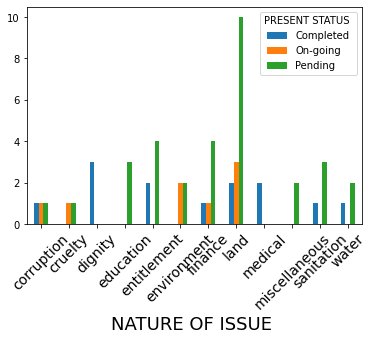

<Figure size 432x288 with 0 Axes>

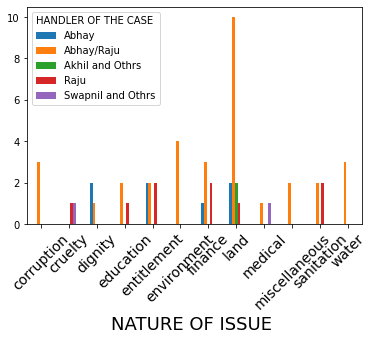

<Figure size 432x288 with 0 Axes>

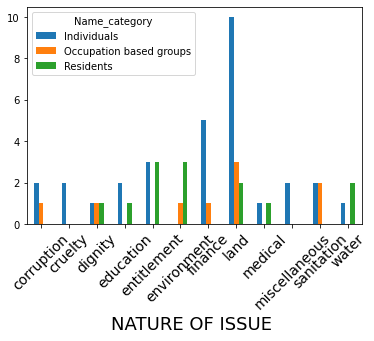

<Figure size 432x288 with 0 Axes>

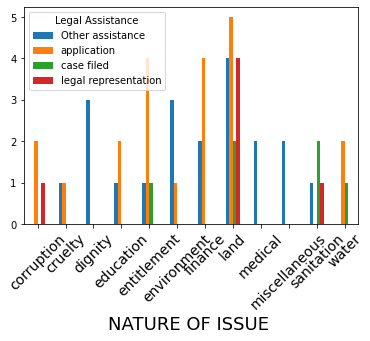

<Figure size 432x288 with 0 Axes>

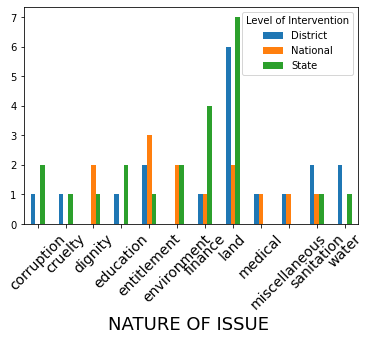

<Figure size 432x288 with 0 Axes>

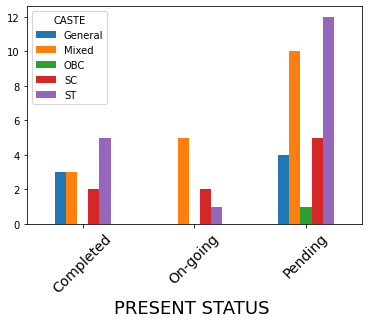

<Figure size 432x288 with 0 Axes>

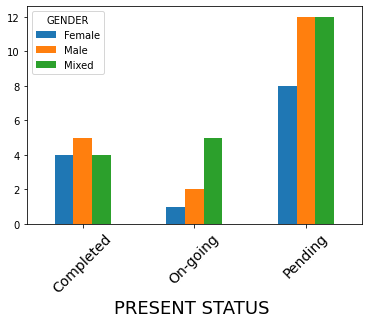

<Figure size 432x288 with 0 Axes>

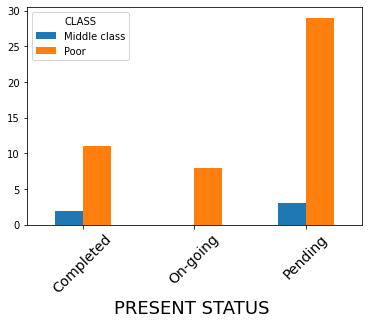

<Figure size 432x288 with 0 Axes>

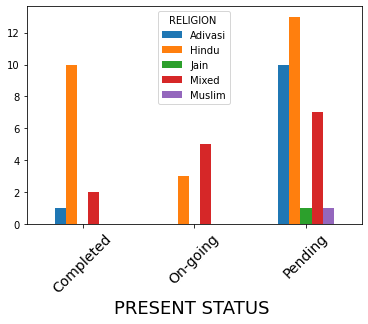

<Figure size 432x288 with 0 Axes>

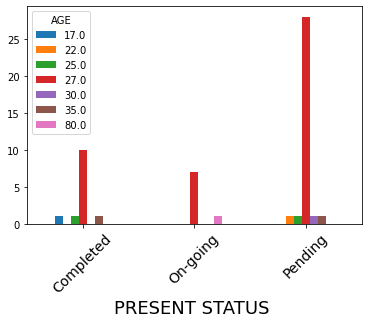

<Figure size 432x288 with 0 Axes>

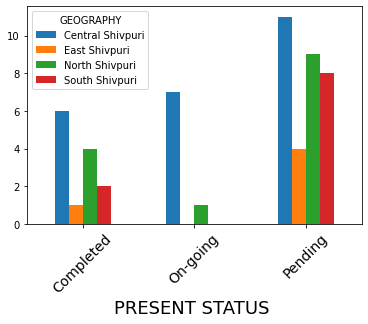

<Figure size 432x288 with 0 Axes>

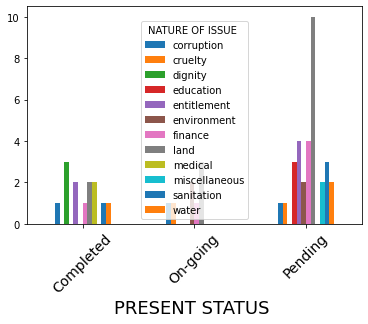

<Figure size 432x288 with 0 Axes>

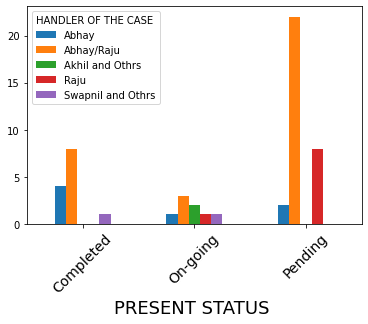

<Figure size 432x288 with 0 Axes>

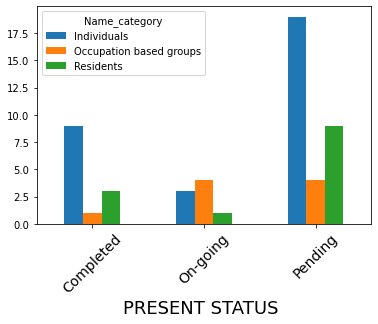

<Figure size 432x288 with 0 Axes>

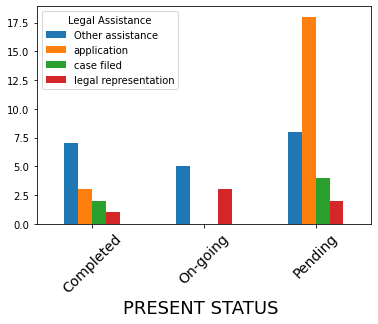

<Figure size 432x288 with 0 Axes>

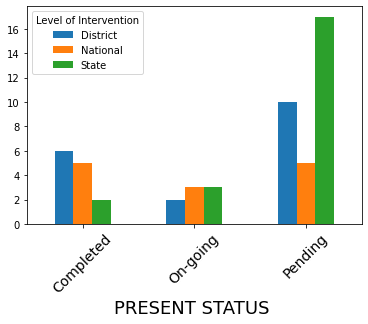

<Figure size 432x288 with 0 Axes>

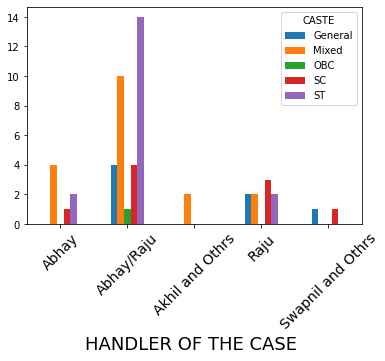

<Figure size 432x288 with 0 Axes>

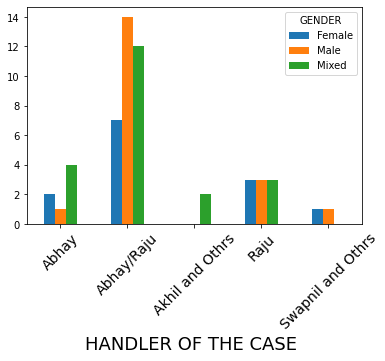

<Figure size 432x288 with 0 Axes>

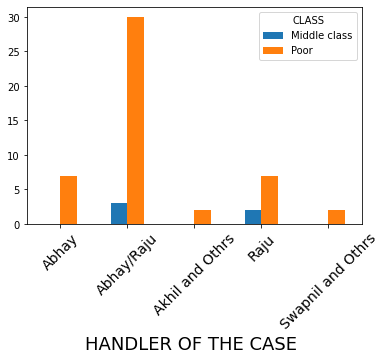

<Figure size 432x288 with 0 Axes>

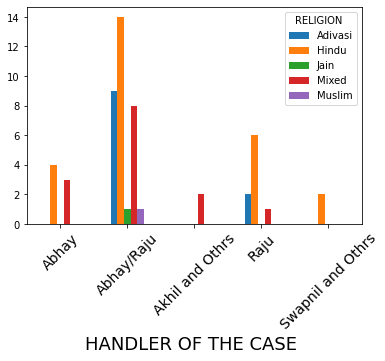

<Figure size 432x288 with 0 Axes>

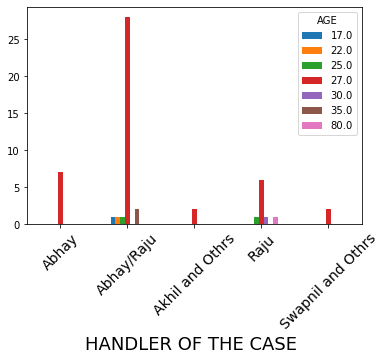

<Figure size 432x288 with 0 Axes>

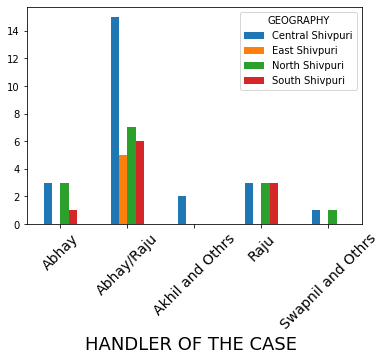

<Figure size 432x288 with 0 Axes>

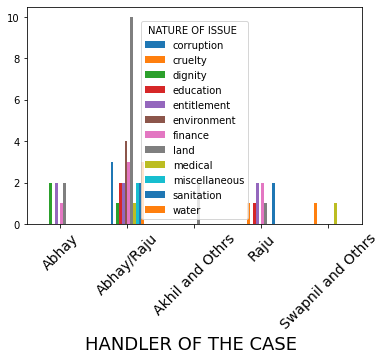

<Figure size 432x288 with 0 Axes>

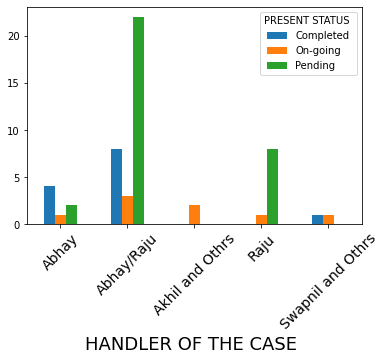

<Figure size 432x288 with 0 Axes>

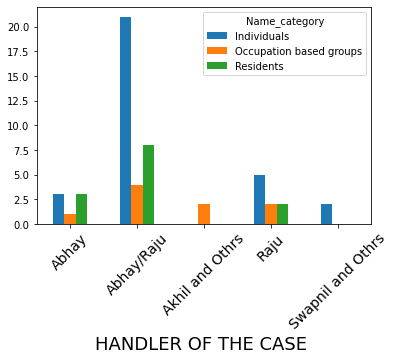

<Figure size 432x288 with 0 Axes>

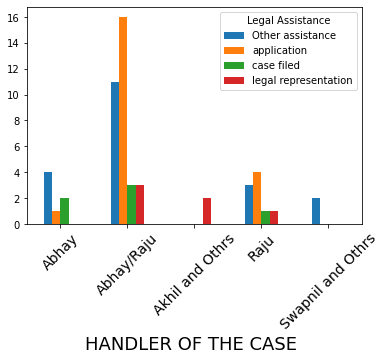

<Figure size 432x288 with 0 Axes>

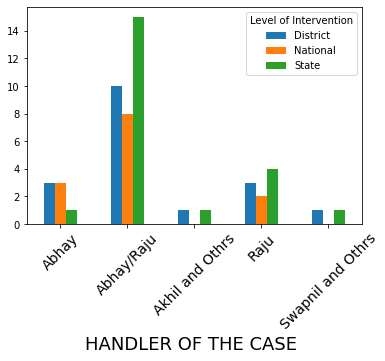

<Figure size 432x288 with 0 Axes>

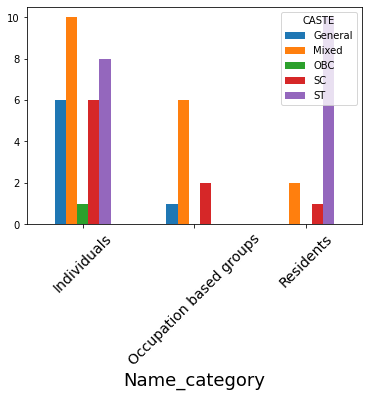

<Figure size 432x288 with 0 Axes>

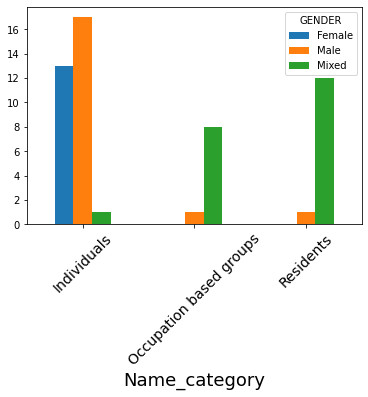

<Figure size 432x288 with 0 Axes>

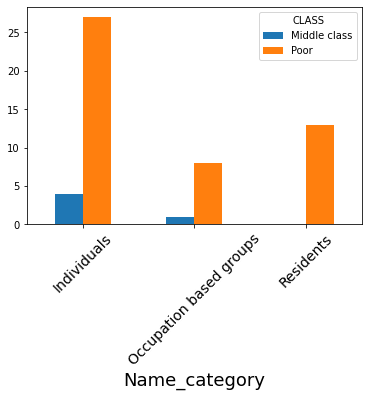

<Figure size 432x288 with 0 Axes>

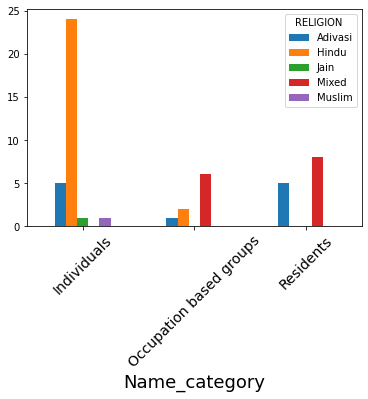

<Figure size 432x288 with 0 Axes>

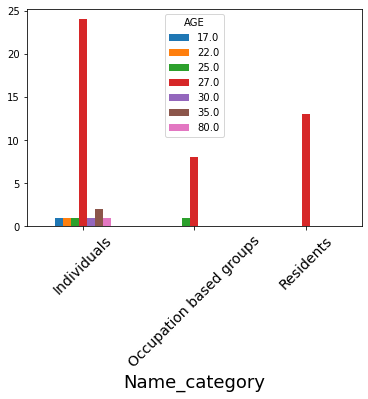

<Figure size 432x288 with 0 Axes>

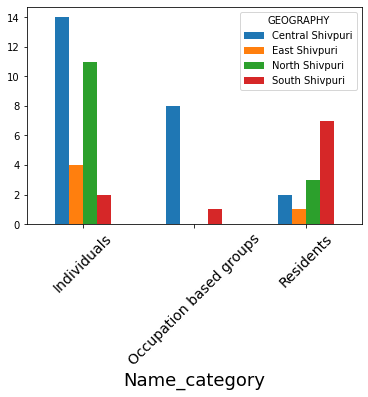

<Figure size 432x288 with 0 Axes>

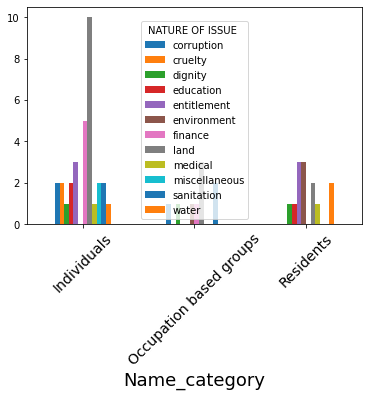

<Figure size 432x288 with 0 Axes>

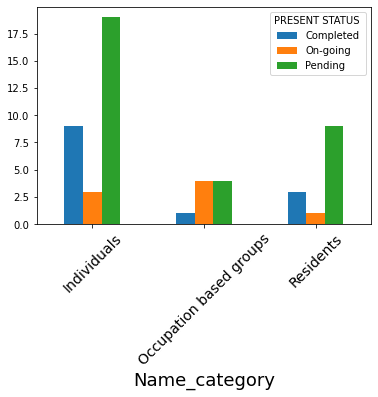

<Figure size 432x288 with 0 Axes>

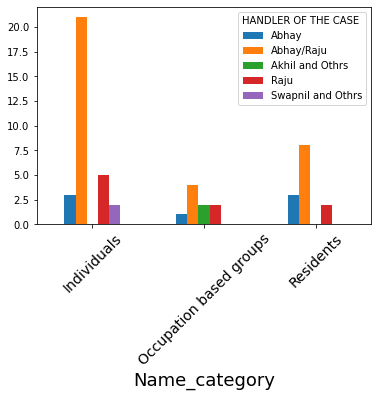

<Figure size 432x288 with 0 Axes>

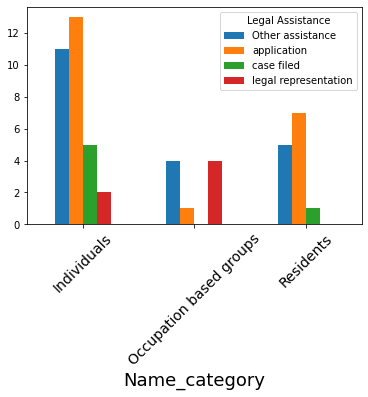

<Figure size 432x288 with 0 Axes>

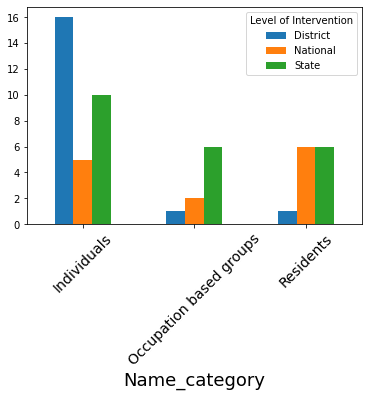

<Figure size 432x288 with 0 Axes>

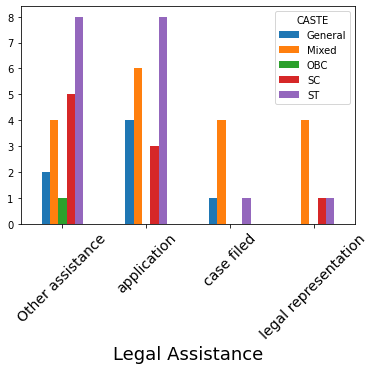

<Figure size 432x288 with 0 Axes>

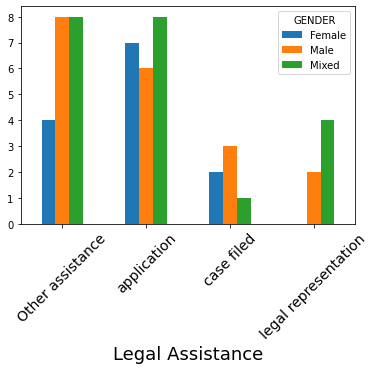

<Figure size 432x288 with 0 Axes>

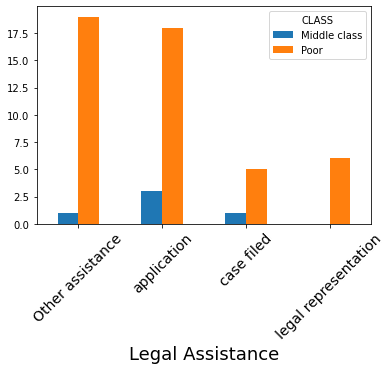

<Figure size 432x288 with 0 Axes>

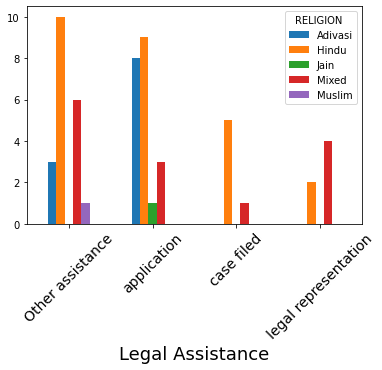

<Figure size 432x288 with 0 Axes>

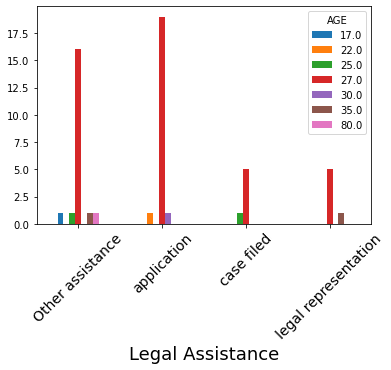

<Figure size 432x288 with 0 Axes>

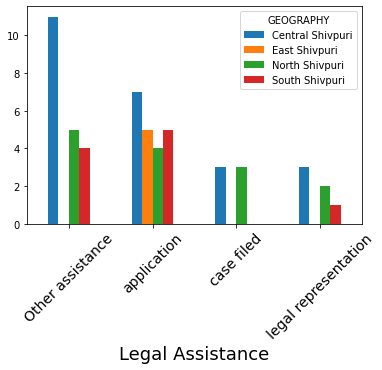

<Figure size 432x288 with 0 Axes>

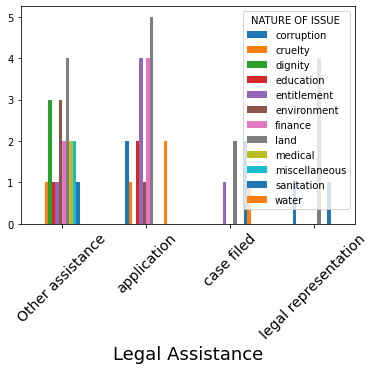

<Figure size 432x288 with 0 Axes>

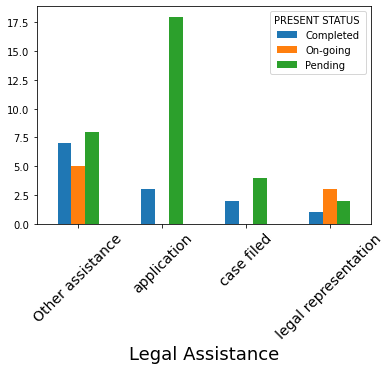

<Figure size 432x288 with 0 Axes>

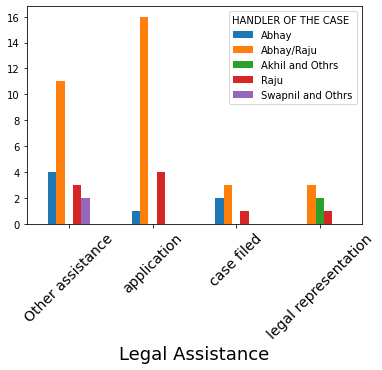

<Figure size 432x288 with 0 Axes>

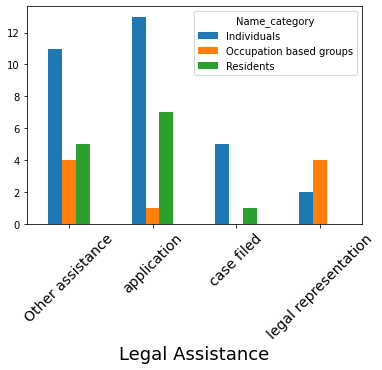

<Figure size 432x288 with 0 Axes>

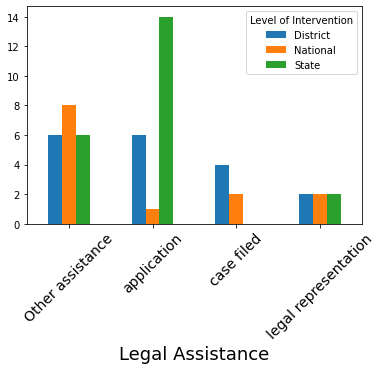

<Figure size 432x288 with 0 Axes>

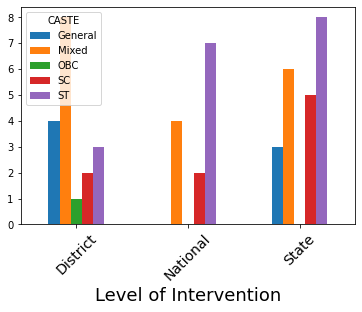

<Figure size 432x288 with 0 Axes>

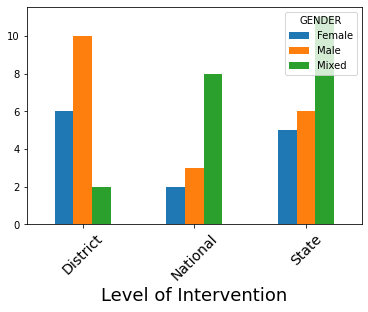

<Figure size 432x288 with 0 Axes>

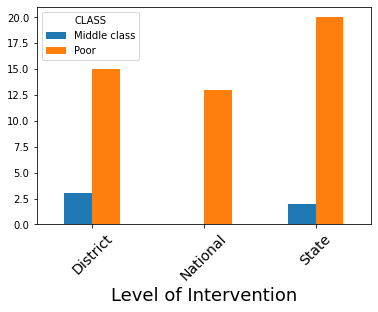

<Figure size 432x288 with 0 Axes>

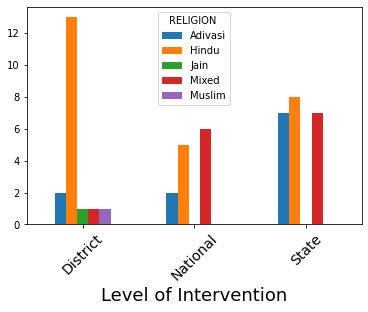

<Figure size 432x288 with 0 Axes>

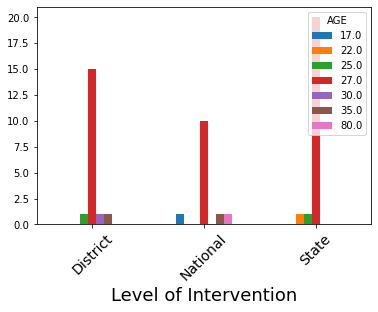

<Figure size 432x288 with 0 Axes>

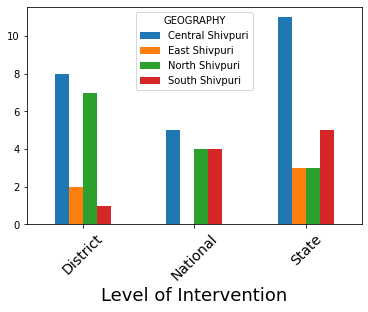

<Figure size 432x288 with 0 Axes>

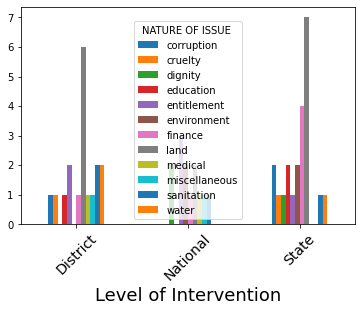

<Figure size 432x288 with 0 Axes>

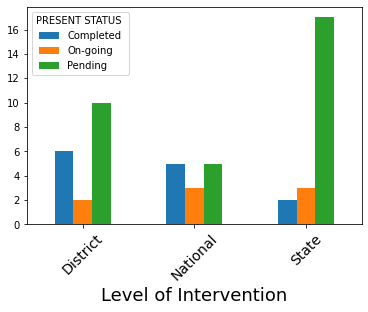

<Figure size 432x288 with 0 Axes>

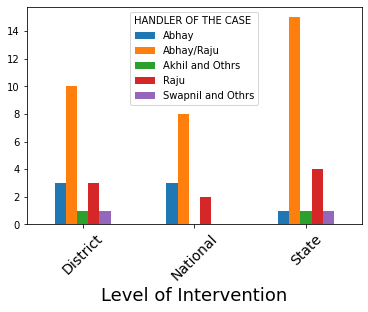

<Figure size 432x288 with 0 Axes>

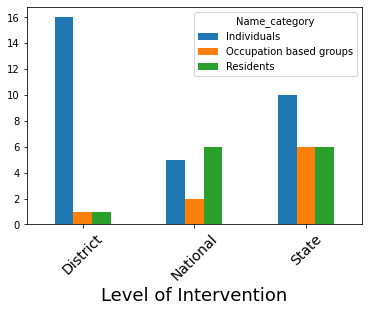

<Figure size 432x288 with 0 Axes>

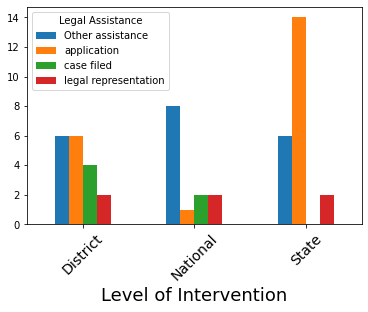

In [243]:
for i in df.columns:
    for j in df.drop(i,axis=1).columns:
        plt.tight_layout()
        pd.crosstab(df[i],df[j]).plot(kind="bar")
        plt.xticks(fontsize=14, rotation=45)
        plt.xlabel(i, fontsize=18)
        plt.show()

In [244]:
df.head()

,CASTE,GENDER,CLASS,RELIGION,AGE,GEOGRAPHY,NATURE OF ISSUE,PRESENT STATUS,HANDLER OF THE CASE,Name_category,Legal Assistance,Level of Intervention
0,SC,Mixed,Poor,Hindu,27.0,Central Shivpuri,dignity,Completed,Abhay,Occupation based groups,Other assistance,State
1,ST,Mixed,Poor,Mixed,27.0,North Shivpuri,dignity,Completed,Abhay,Residents,Other assistance,National
2,SC,Male,Poor,Hindu,27.0,North Shivpuri,cruelty,On-going,Swapnil and Othrs,Individuals,Other assistance,State
3,ST,Mixed,Poor,Mixed,27.0,South Shivpuri,entitlement,Completed,Abhay,Residents,Other assistance,National
4,General,Female,Poor,Hindu,27.0,Central Shivpuri,medical,Completed,Swapnil and Othrs,Individuals,Other assistance,District
